In [1]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd

## Loading Audio Files

In [2]:
piano_file = "piano_c.wav"
tremolo_file = "tremolo.wav"
violin_file = "violin_c.wav"

In [3]:
ipd.Audio(piano_file)

In [4]:
ipd.Audio(tremolo_file)

In [5]:
ipd.Audio(violin_file)

In [6]:
# load audio files with librosa
piano_c, sr1 = librosa.load(piano_file)
tremolo, sr2 = librosa.load(tremolo_file)
violin_c, sr3 = librosa.load(violin_file)

In [7]:
piano_c

array([-3.4608310e-01, -5.7889587e-01, -5.7302415e-01, ...,
        3.5212681e-06, -5.3511017e-06, -6.6172838e-06], dtype=float32)

## Root-mean-squared energy with Librosa

In [8]:
FRAME_SIZE = 1024
HOP_LENGTH = 512

In [9]:
rms_piano_c = librosa.feature.rms(y=piano_c, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
rms_tremolo = librosa.feature.rms(y=tremolo, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
rms_violin_c = librosa.feature.rms(y=violin_c, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

## Visualise RMSE + waveform

In [10]:
frames = range(len(rms_piano_c))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

ValueError: x and y must have same first dimension, but have shapes (67,) and (38,)

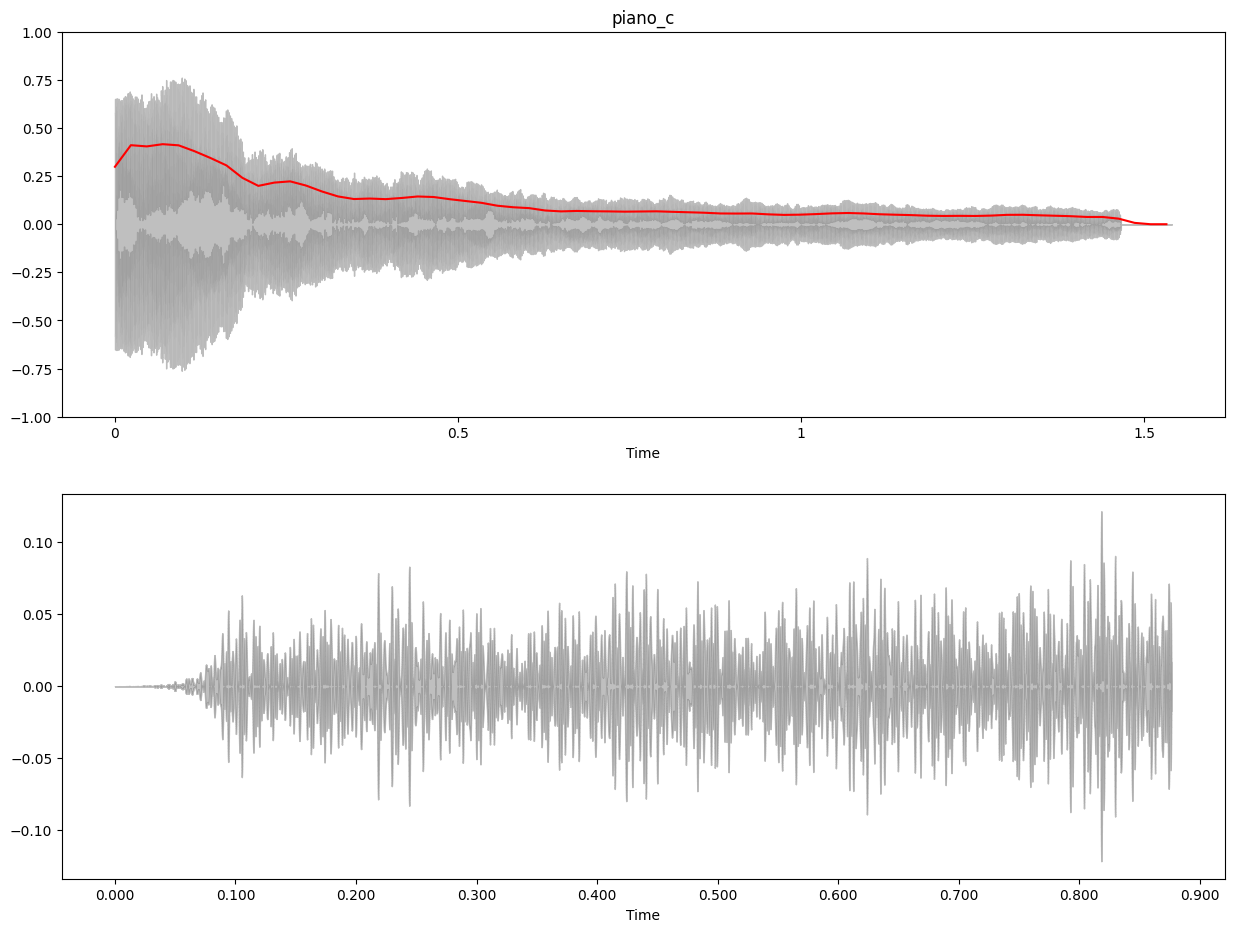

In [13]:
# rms energy is graphed in red

plt.figure(figsize=(15, 17))

ax = plt.subplot(3, 1, 1)
librosa.display.waveshow(piano_c,sr=sr1, alpha=0.5, color="grey")
plt.plot(t, rms_piano_c, color="r")
plt.ylim((-1, 1))
plt.title("piano_c")

plt.subplot(3, 1, 2)
librosa.display.waveshow(tremolo, sr=sr2,alpha=0.5, color="grey")
plt.plot(t, rms_tremolo, color="r")
plt.ylim((-1, 1))
plt.title("tremolo")

plt.subplot(3, 1, 3)
librosa.display.waveshow(violin_c, sr=sr3,alpha=0.5, color="grey")
plt.plot(t, rms_violin_c, color="r")
plt.ylim((-1, 1))
plt.title("violin_c Ellington")

plt.show()

## RMSE from scratch

In [ ]:
def rmse(signal, frame_size, hop_length):
    rmse = []
    
    # calculate rmse for each frame
    for i in range(0, len(signal), hop_length): 
        rmse_current_frame = np.sqrt(sum(signal[i:i+frame_size]**2) / frame_size)
        rmse.append(rmse_current_frame)
    return np.array(rmse)    

In [ ]:
rms_piano_c1 = rmse(piano_c, FRAME_SIZE, HOP_LENGTH)
rms_tremolo1 = rmse(tremolo, FRAME_SIZE, HOP_LENGTH)
rms_violin_c1 = rmse(violin_c, FRAME_SIZE, HOP_LENGTH)

In [ ]:
plt.figure(figsize=(15, 17))

ax = plt.subplot(3, 1, 1)
librosa.display.waveplot(piano_c, alpha=0.5)
plt.plot(t, rms_piano_c, color="r")
plt.plot(t, rms_piano_c1, color="y")
plt.ylim((-1, 1))
plt.title("Debusy")

plt.subplot(3, 1, 2)
librosa.display.waveplot(tremolo, alpha=0.5)
plt.plot(t, rms_tremolo, color="r")
plt.plot(t, rms_tremolo1, color="y")
plt.ylim((-1, 1))
plt.title("RHCP")

plt.subplot(3, 1, 3)
librosa.display.waveplot(violin_c, alpha=0.5)
plt.plot(t, rms_violin_c, color="r")
plt.plot(t, rms_violin_c1, color="y")
plt.ylim((-1, 1))
plt.title("violin_c Ellington")

plt.show()

## Zero-crossing rate with Librosa

In [ ]:
zcr_piano_c = librosa.feature.zero_crossing_rate(piano_c, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_tremolo = librosa.feature.zero_crossing_rate(tremolo, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_violin_c = librosa.feature.zero_crossing_rate(violin_c, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

In [ ]:
zcr_piano_c.size

## Visualise zero-crossing rate with Librosa

In [ ]:
plt.figure(figsize=(15, 10))

plt.plot(t, zcr_piano_c, color="y")
plt.plot(t, zcr_tremolo, color="r")
plt.plot(t, zcr_violin_c, color="b")
plt.ylim(0, 1)
plt.show()

## ZCR: Voice vs Noise

In [ ]:
voice_file = "audio/voice.wav"
noise_file = "audio/noise.wav"

In [ ]:
ipd.Audio(voice_file)

In [ ]:
ipd.Audio(noise_file)

In [ ]:
# load audio files
voice, _ = librosa.load(voice_file, duration=15)
noise, _ = librosa.load(noise_file, duration=15)

In [ ]:
# get ZCR
zcr_voice = librosa.feature.zero_crossing_rate(voice, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_noise = librosa.feature.zero_crossing_rate(noise, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

In [ ]:
frames = range(len(zcr_voice))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

In [ ]:
plt.figure(figsize=(15, 10))

plt.plot(t, zcr_voice, color="y")
plt.plot(t, zcr_noise, color="r")
plt.ylim(0, 1)
plt.show()